# **City-Cycle Fuel Consumption Prediction**


In this Jupyter Notebook we will explore the Auto-MPG dataset originally found in statlib and reuploaded to [UCI's Machine Learning Repositoy](https://archive.ics.uci.edu/ml/datasets/auto+mpg). We will  use our knowledge of regression, correlation, data munging and feature selection to help predict the mpg a test car gets.

![](https://amp.businessinsider.com/images/56c8b512dd0895906d8b467a-1334-937.jpg)

# **Import Libraries**

We start by importing the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Read in data!**

Let's read in our data and look at it.

In [2]:
auto = pd.read_csv('auto-mpg.csv')

In [3]:
auto.tail(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,chevy s-10


In [4]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
auto.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


# **Cleaning our data up!**

We start off cleaning our data by looking at possible problematic entries.

In [6]:
categorical = [columns for columns in auto.dtypes.index if auto.dtypes[columns] == 'object']
print(categorical)

['horsepower', 'car name']


Here we observe the horsepower is actually a string instead of an int.
Pandas has had a hard time converting it into an integer column, so let's see what is going on.

In [7]:
auto['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
95     14
75     14
67     12
105    12
70     12
65     10
85      9
97      9
80      7
145     7
140     7
84      6
92      6
68      6
?       6
72      6
78      6
175     5
180     5
170     5
86      5
115     5
71      5
60      5
130     5
       ..
94      1
91      1
61      1
230     1
220     1
132     1
200     1
93      1
116     1
122     1
148     1
64      1
149     1
49      1
138     1
54      1
135     1
107     1
142     1
208     1
113     1
66      1
193     1
103     1
137     1
210     1
77      1
133     1
108     1
89      1
Name: horsepower, Length: 94, dtype: int64

We see that there is a '?' representing 6 values! So we will replace this with a NaN value.

In [8]:
auto['horsepower'].replace(to_replace={'?':np.nan},inplace=True)

By dropping using 'any' we see we only drop the 6 cars we do not have information about horsepower on.

In [9]:
auto.dropna(0,'any',inplace=True)

Now let's make sure we have no null values anymore.

In [10]:
print(auto.apply(lambda x : sum(x.isnull())))
print(auto.apply(lambda x : len(x.unique())))

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64
mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64


GREAT!

Now that the string values are gone and any resuting row has been deleted, we may change horsepower into an integer column.

In [11]:
auto['horsepower'] = auto['horsepower'].apply(int)

We will map the origin to its string interpretations.

In [12]:
auto['origin'] = auto['origin'].map({1:'America',2:'Europe',3:'Asia'})

Let's check our progress in turning horsepower into a integer and also mapping origin to its correct country.

In [13]:
auto['origin'].head(20)

0     America
1     America
2     America
3     America
4     America
5     America
6     America
7     America
8     America
9     America
10    America
11    America
12    America
13    America
14       Asia
15    America
16    America
17    America
18       Asia
19     Europe
Name: origin, dtype: object

In [14]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null object
car name        392 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [15]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# **Visualizations!**

Now that we have dealt with missing data and cleaned up our origin column, let's plot our data out!

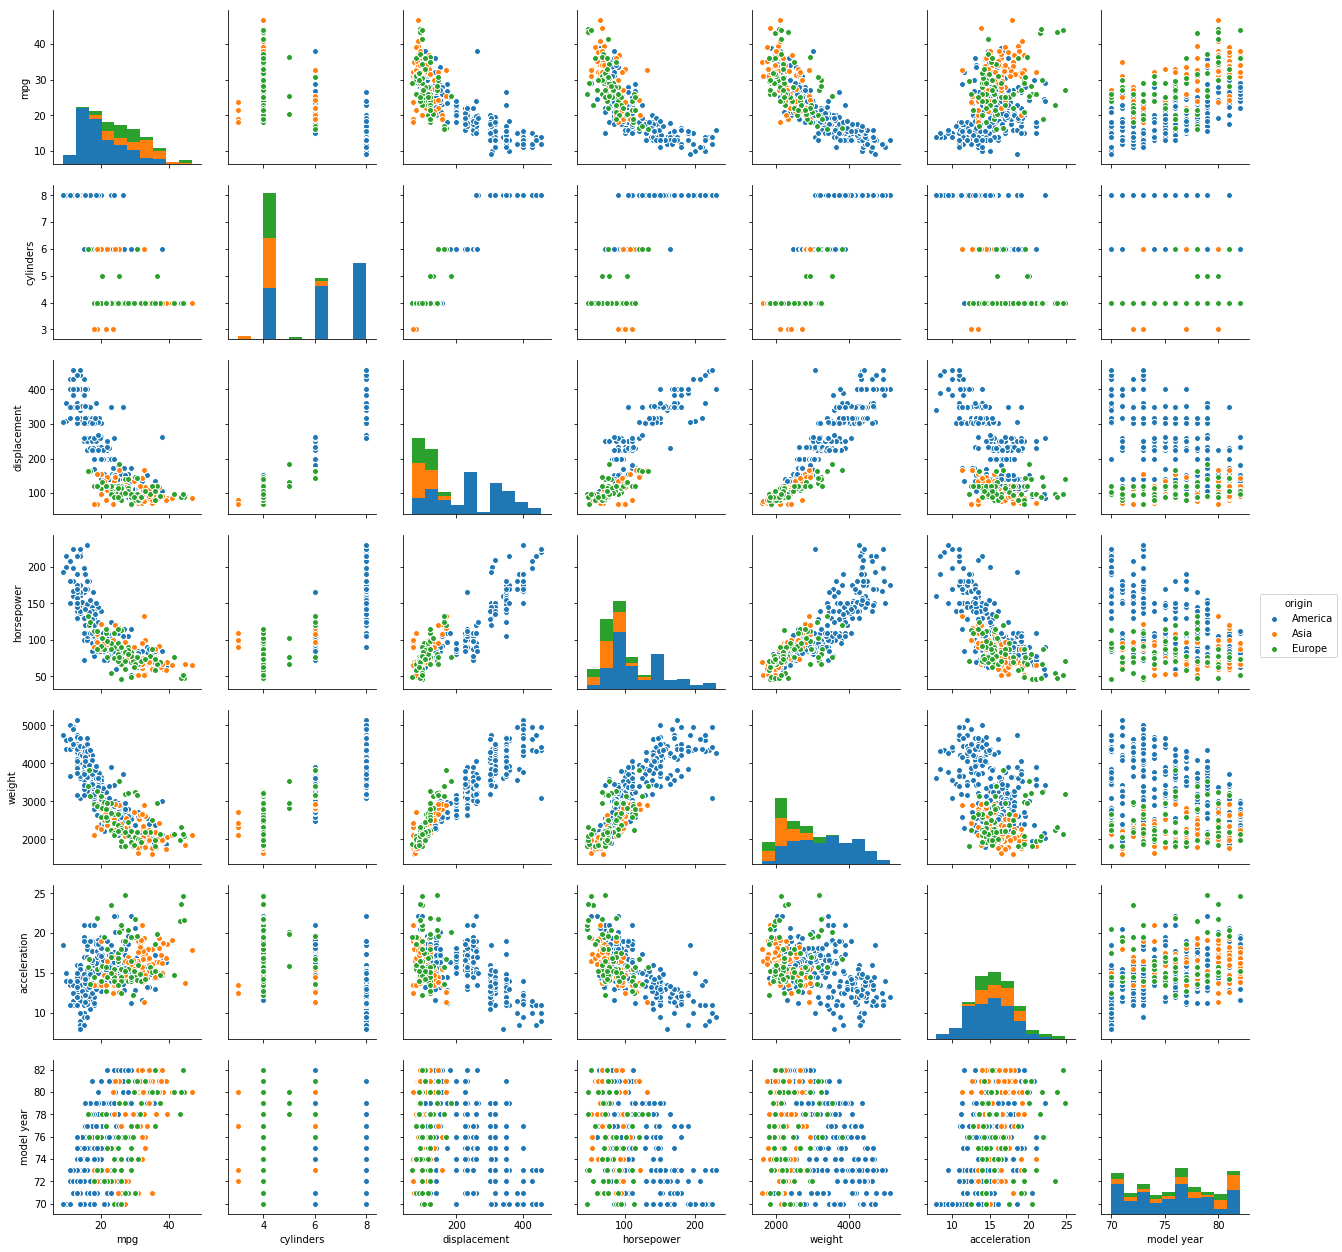

In [16]:
sns.pairplot(auto,hue='origin')

In [17]:
var = auto.describe().columns
var

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year'],
      dtype='object')

We may now plot out our categorical variables here and observe some differences by country.

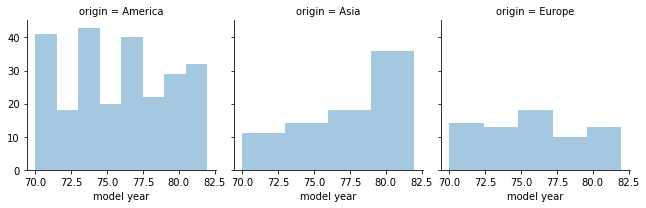

In [18]:
facet = sns.FacetGrid(auto, col="origin",sharex=True,sharey=True)
facet.map(sns.distplot, "model year",kde=False)

We now want to observe the relationship between mpg and the other features using lmplot to fit a regression model.

Text(0.5,1,'mpg vs displacement')

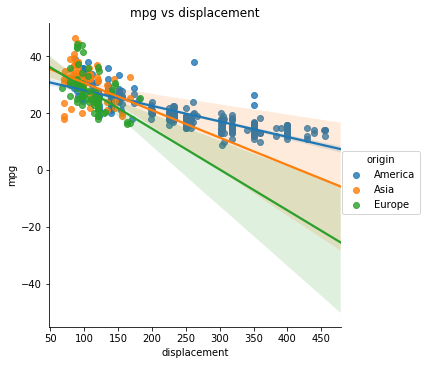

In [19]:
sns.lmplot(var[2],'mpg',data=auto,hue='origin')
plt.title('mpg vs displacement')

Text(0.5,1,'mpg vs horsepower')

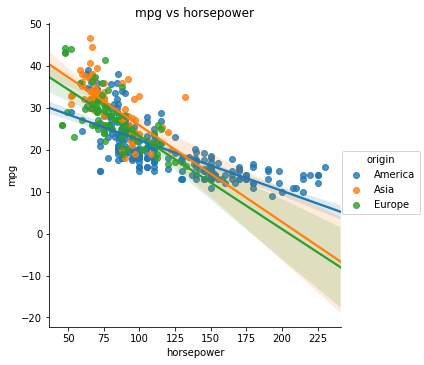

In [20]:
sns.lmplot(var[3],'mpg',data=auto,hue='origin')
plt.title('mpg vs horsepower')

Text(0.5,1,'mpg vs weight')

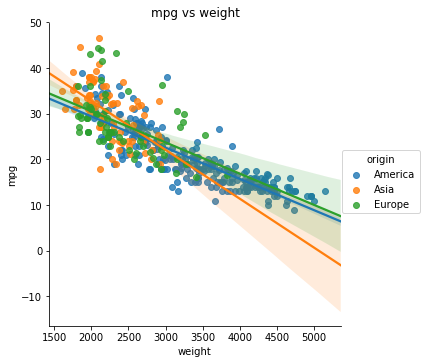

In [21]:
sns.lmplot(var[4],'mpg',data=auto,hue='origin')
plt.title('mpg vs weight')

Text(0.5,1,'mpg vs acceleration')

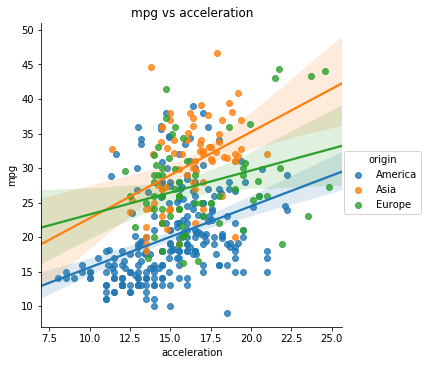

In [22]:
sns.lmplot(var[5],'mpg',data=auto,hue='origin')
plt.title('mpg vs acceleration')

# **Let's make our predictions!**

Now that we have observed some of the stronger relationships between our target and some of the features, we can use these stronger features to help predict mpg.

We now use sklearn to split our data and fit a linear regression model for mpg.

In [49]:
from sklearn.model_selection import train_test_split
model_year = pd.get_dummies(auto['model year'],drop_first=True)
X = auto[['displacement','horsepower','weight','acceleration']]
y = auto['mpg']
X = pd.concat([X,model_year],axis=1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

We now fit our model with our data.

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Finally, we can make some predictions and see the results!

In [26]:
predictions = lm.predict(X_test)

# **Checking our predictions**

We now want to plot out our predictions vs the actual values.

Text(0.5,1,'Prediction vs Actual')

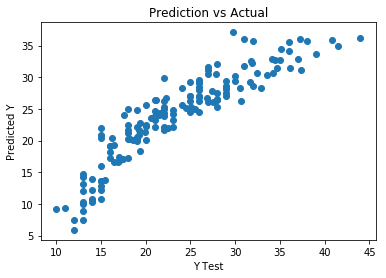

In [27]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Prediction vs Actual')

We can see a linear pattern, but it isn't the best and therefore we may be able to optimize our model a bit.

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.4989518310862313
MSE: 9.6861535313766
RMSE: 3.1122585900558777


Here we can see our errors. This is actually very good, but for practice we can continue to optimize the model further.

Text(0.5,1,'Distribution Plot of mpg')

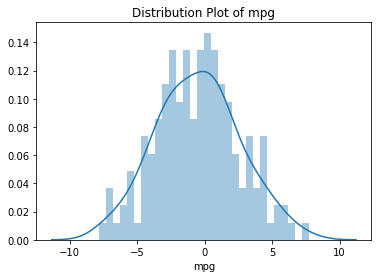

In [29]:
sns.distplot((y_test-predictions),bins=30);
plt.title('Distribution Plot of mpg')

Using a distribution plot we can see our errors tend to be closer to 0 and are relatively normally distributed.

# **Feature Engineering**

Let's now try to create a better model by using some functions to split our data into a more meaningful form.

We will start by splitting car name into the car's make and model.

In [30]:
auto['make'] = auto['car name'].apply(lambda x: x.split()[0])
auto['model'] = auto['car name'].apply(lambda x: ' '.join(x.split()[1:]))
auto.drop('car name',axis=1,inplace=True)

Let's check if it worked correctly.

In [31]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make,model
0,18.0,8,307.0,130,3504,12.0,70,America,chevrolet,chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,America,buick,skylark 320
2,18.0,8,318.0,150,3436,11.0,70,America,plymouth,satellite
3,16.0,8,304.0,150,3433,12.0,70,America,amc,rebel sst
4,17.0,8,302.0,140,3449,10.5,70,America,ford,torino


In [32]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null int64
weight          392 non-null int64
acceleration    392 non-null float64
model year      392 non-null int64
origin          392 non-null object
make            392 non-null object
model           392 non-null object
dtypes: float64(3), int64(4), object(3)
memory usage: 43.7+ KB


Great, we may now look at our values in our new make column.

In [33]:
auto['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

As this is raw data, there is some mispellings and we must account for this and replace them.

In [34]:
car_replace_dict = {'toyouta':'toyota',
                    'chevroelt':'chevrolet',
                    'vw':'volkswagen',
                    'vokswagen':'volkswagen',
                    'chevy':'chevrolet',
                    'maxda':'mazda',
                    'mercedes':'mercedes-benz'}

auto['make'].replace(to_replace=car_replace_dict,inplace=True)

We will also deal with the make named 'hi'.

In [35]:
hi_row = auto[auto['make'] == 'hi']
hi_row

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,make,model
28,9.0,8,304.0,193,4732,18.5,70,America,hi,1200d


This data isn't very clear and makes it hard to interpret, for this reason we will dispose of this row entry.

In [36]:
print(len(auto))
auto.drop(auto[auto['make'] == 'hi'].index,inplace=True)
print(len(auto))

392
391


In [37]:
auto['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'honda', 'subaru', 'capri',
       'mercedes-benz', 'cadillac', 'triumph', 'nissan'], dtype=object)

# **Predictions again!**

We now get to make our predictions once more, but with more features this time.

In [51]:
make = pd.get_dummies(auto['make'],drop_first=True)
model_year = pd.get_dummies(auto['model year'],drop_first=True)

In [52]:
X = auto[['displacement','horsepower','weight','acceleration']]
y = auto['mpg']
X = pd.concat([X,make,model_year],axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 0 to 397
Data columns (total 44 columns):
displacement     391 non-null float64
horsepower       391 non-null int64
weight           391 non-null int64
acceleration     391 non-null float64
audi             391 non-null uint8
bmw              391 non-null uint8
buick            391 non-null uint8
cadillac         391 non-null uint8
capri            391 non-null uint8
chevrolet        391 non-null uint8
chrysler         391 non-null uint8
datsun           391 non-null uint8
dodge            391 non-null uint8
fiat             391 non-null uint8
ford             391 non-null uint8
honda            391 non-null uint8
mazda            391 non-null uint8
mercedes-benz    391 non-null uint8
mercury          391 non-null uint8
nissan           391 non-null uint8
oldsmobile       391 non-null uint8
opel             391 non-null uint8
peugeot          391 non-null uint8
plymouth         391 non-null uint8
pontiac          391 non-nu

In [53]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=42)

In [54]:
X.shape

(391, 44)

In [55]:
y.shape

(391,)

In [56]:
lm2 = LinearRegression()
lm2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
predictions2 = lm2.predict(X_test2)

# **Results**

We can now look at our results once more.

Text(0.5,1,'Prediction vs Actual')

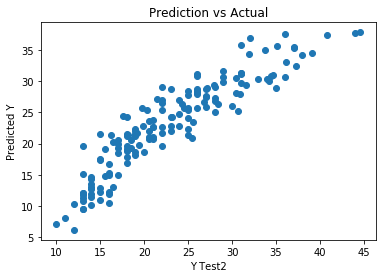

In [58]:
plt.scatter(y_test2,predictions2)
plt.xlabel('Y Test2')
plt.ylabel('Predicted Y')
plt.title('Prediction vs Actual')

This scatter plot seems to be a little more linear than the last one!

In [47]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('\n')
print('MAE:', metrics.mean_absolute_error(y_test2, predictions2))
print('MSE:', metrics.mean_squared_error(y_test2, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test2, predictions2)))

MAE: 2.4989518310862313
MSE: 9.6861535313766
RMSE: 3.1122585900558777


MAE: 2.512777497536596
MSE: 9.418399876956931
RMSE: 3.0689411654440253


We now also have a very slighlty better performance for our model, this isn't really worth the time invested, but was a good excercise with raw data and data extraction.

Text(0.5,1,'Distribution Plot of mpg')

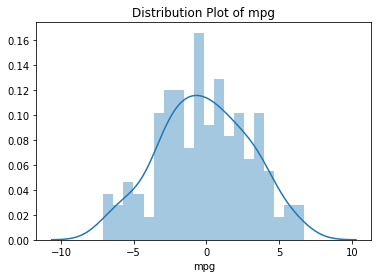

In [61]:
sns.distplot((y_test2-predictions2),bins=20)
plt.title('Distribution Plot of mpg')

FIN.